In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
ls


drive/  sample_data/


In [ ]:

!pip install ultralytics
!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.93 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.0/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
%cd "/content/drive/MyDrive/Dataset"

/content/drive/MyDrive/Dataset


In [ ]:
!pip install roboflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 21.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
from roboflow import Roboflow
import shutil

# Mount Google Drive
drive_path = "/content/drive/MyDrive/Dataset"  # Change folder name as needed

# Initialize Roboflow
rf = Roboflow(api_key="XMzlZ50lfNikO4rN8iV2")
project = rf.workspace("teeth-segmentation").project("teeth-segmentation-evs6x")
dataset = project.version(15).download("yolov8")

# Move the downloaded dataset to Google Drive
shutil.move(dataset.location, drive_path)

print(f"Dataset saved to: {drive_path}")


loading Roboflow workspace...
loading Roboflow project...
Dataset saved to: /content/drive/MyDrive/Dataset


In [ ]:
!yolo task=detect mode=train model=yolov8x.pt data=/content/drive/MyDrive/Dataset/teeth-segmentation-15/data.yaml epochs=30 batch=10 imgsz=640 cache=True single_cls=False val=True dropout=0.6 close_mosaic=0 cos_lr=True exist_ok=True warmup_epochs=10 lrf=0.005

100% 131M/131M [00:00<00:00, 186MB/s]
Ultralytics 8.3.86 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/drive/MyDrive/Dataset/teeth-segmentation-15/data.yaml, epochs=30, time=None, patience=100, batch=10, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.6, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_con

In [ ]:
!ls /content/drive/MyDrive/Dataset/runs2/detect/train

args.yaml					    PR_curve.png	   val_batch0_pred.jpg
confusion_matrix_normalized.png			    R_curve.png		   val_batch1_labels.jpg
confusion_matrix.png				    results.csv		   val_batch1_pred.jpg
events.out.tfevents.1741514133.e1506095b83c.1223.0  results.png		   val_batch2_labels.jpg
F1_curve.png					    train_batch0.jpg	   val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch1.jpg	   weights
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


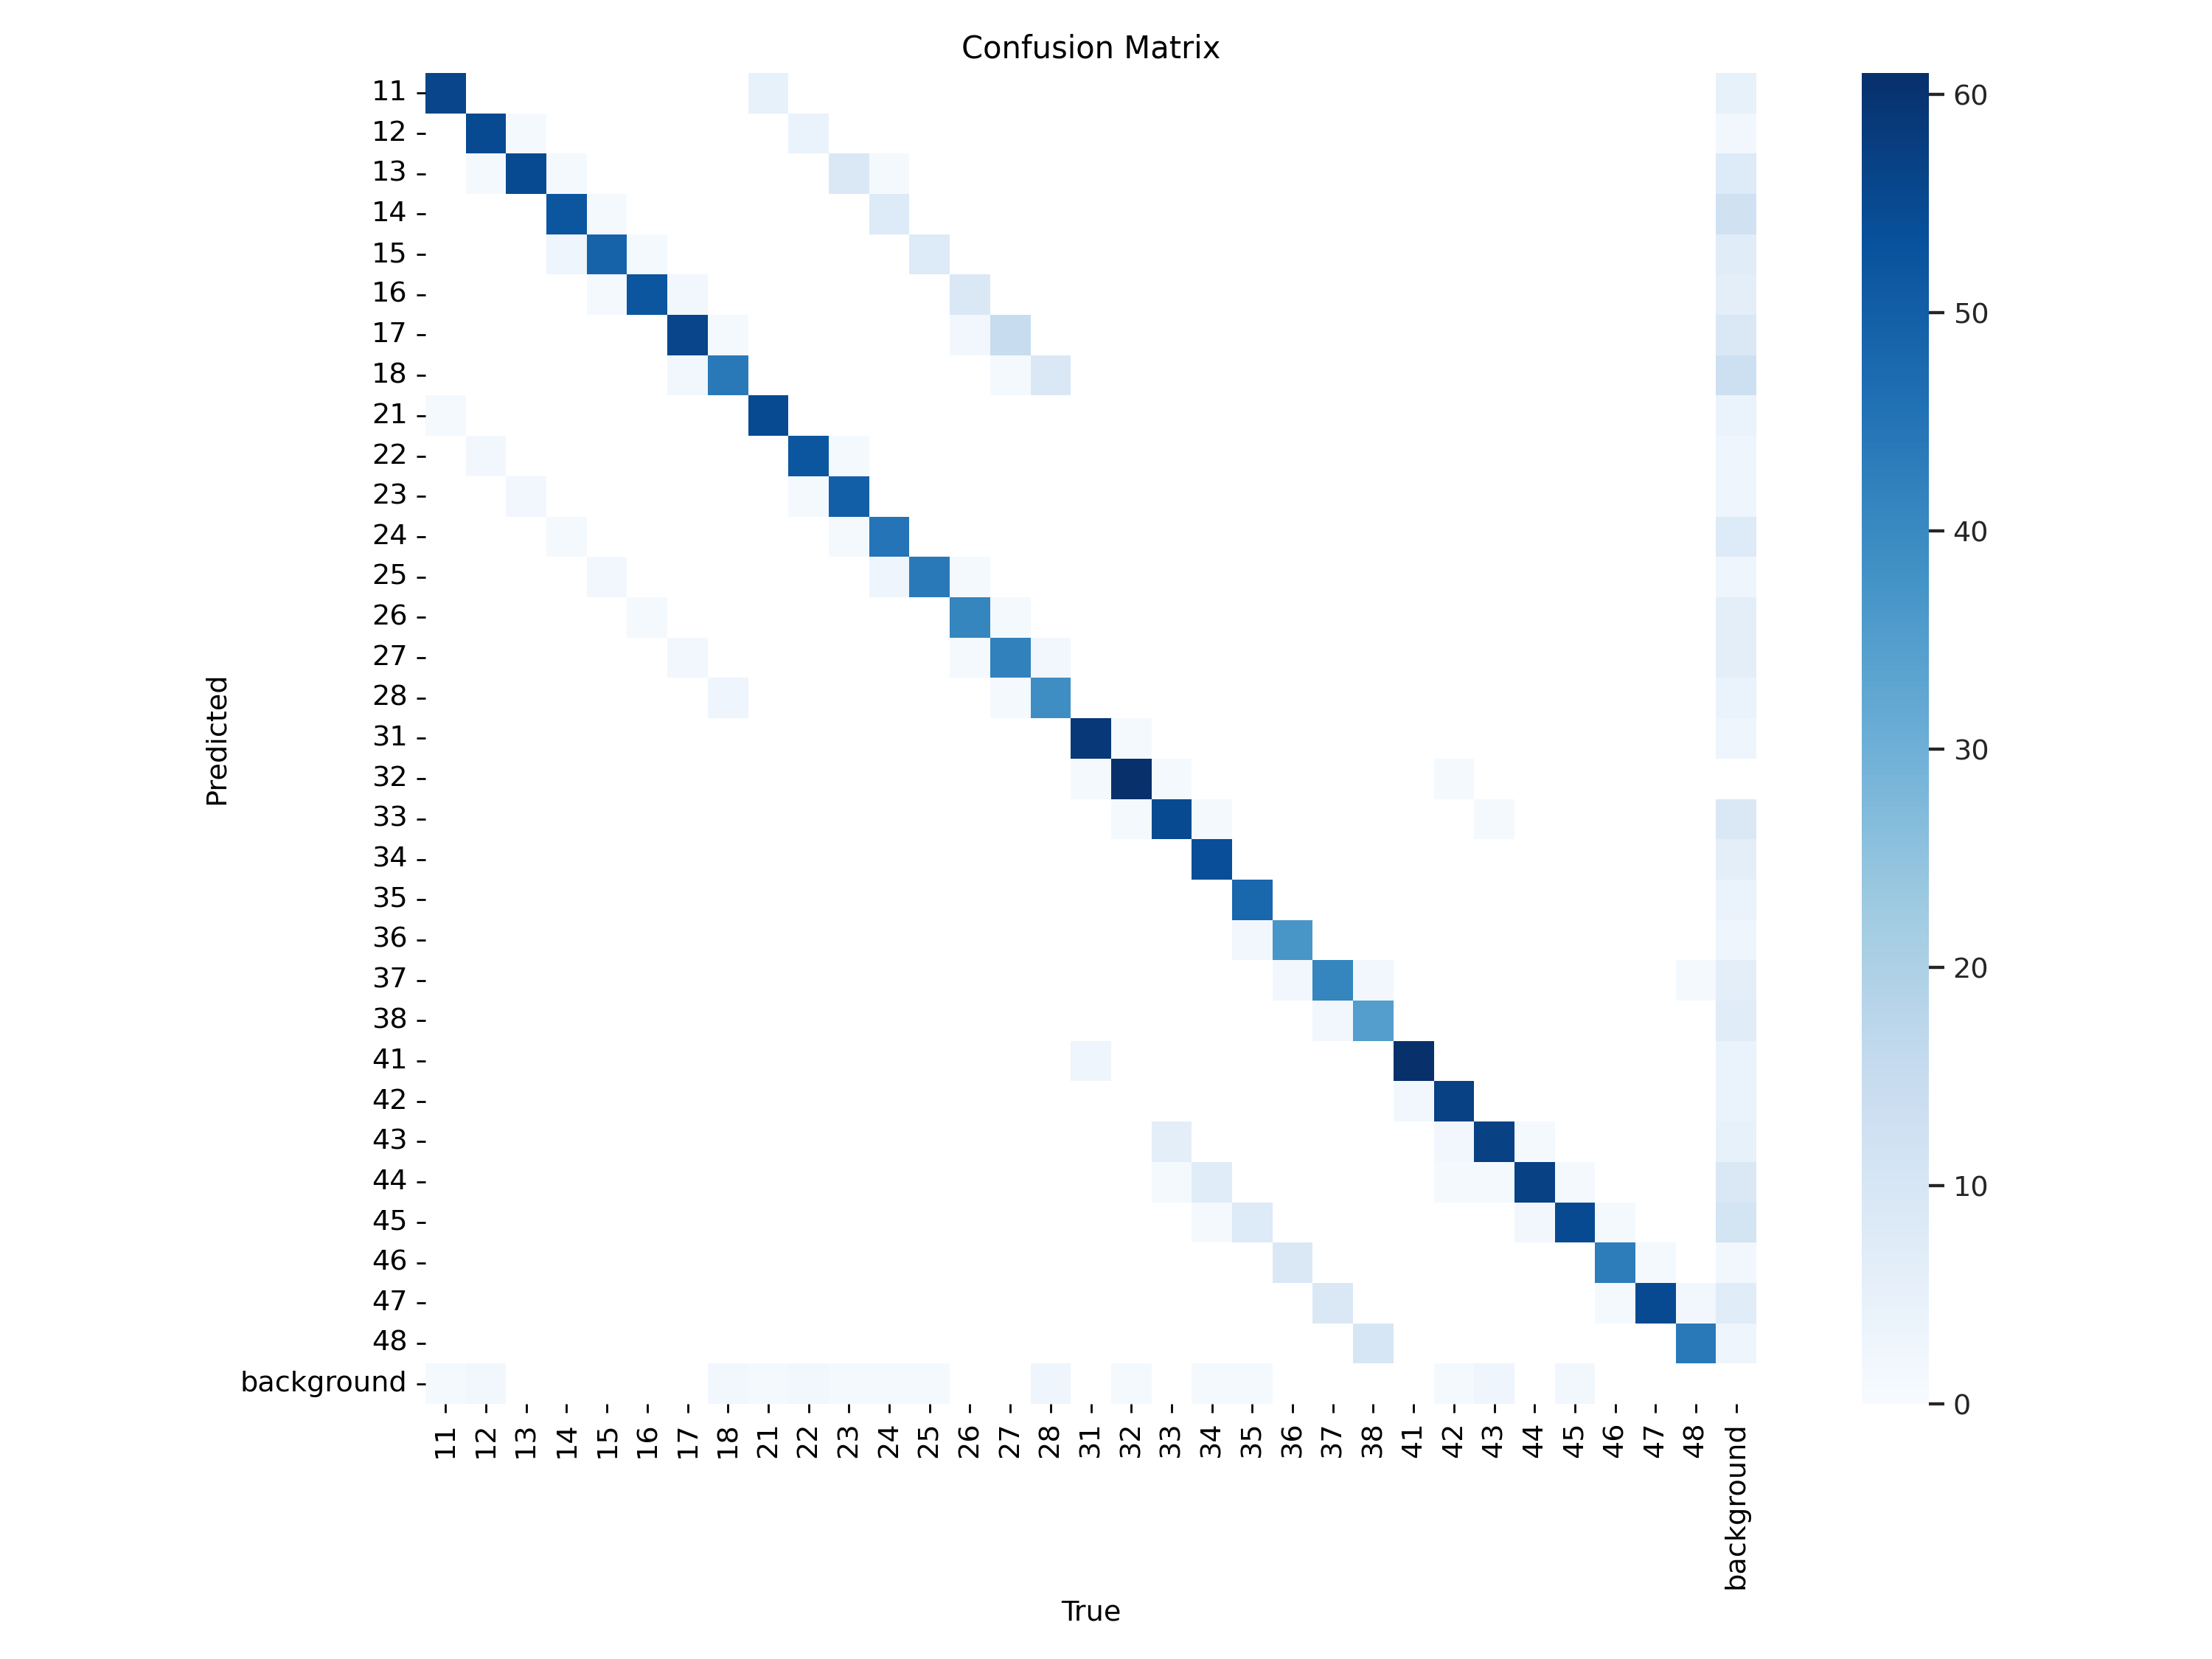

In [ ]:
from IPython.display import Image #Importing the Image object

# Update the file path to the correct location of the confusion matrix
Image(filename=f'/content/drive/MyDrive/Dataset/runs2/detect/train/confusion_matrix.png', width=600)

In [ ]:
!ls /content/drive/MyDrive/Dataset/runs2/detect/train

args.yaml					    PR_curve.png	   val_batch0_pred.jpg
confusion_matrix_normalized.png			    R_curve.png		   val_batch1_labels.jpg
confusion_matrix.png				    results.csv		   val_batch1_pred.jpg
events.out.tfevents.1741514133.e1506095b83c.1223.0  results.png		   val_batch2_labels.jpg
F1_curve.png					    train_batch0.jpg	   val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch1.jpg	   weights
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


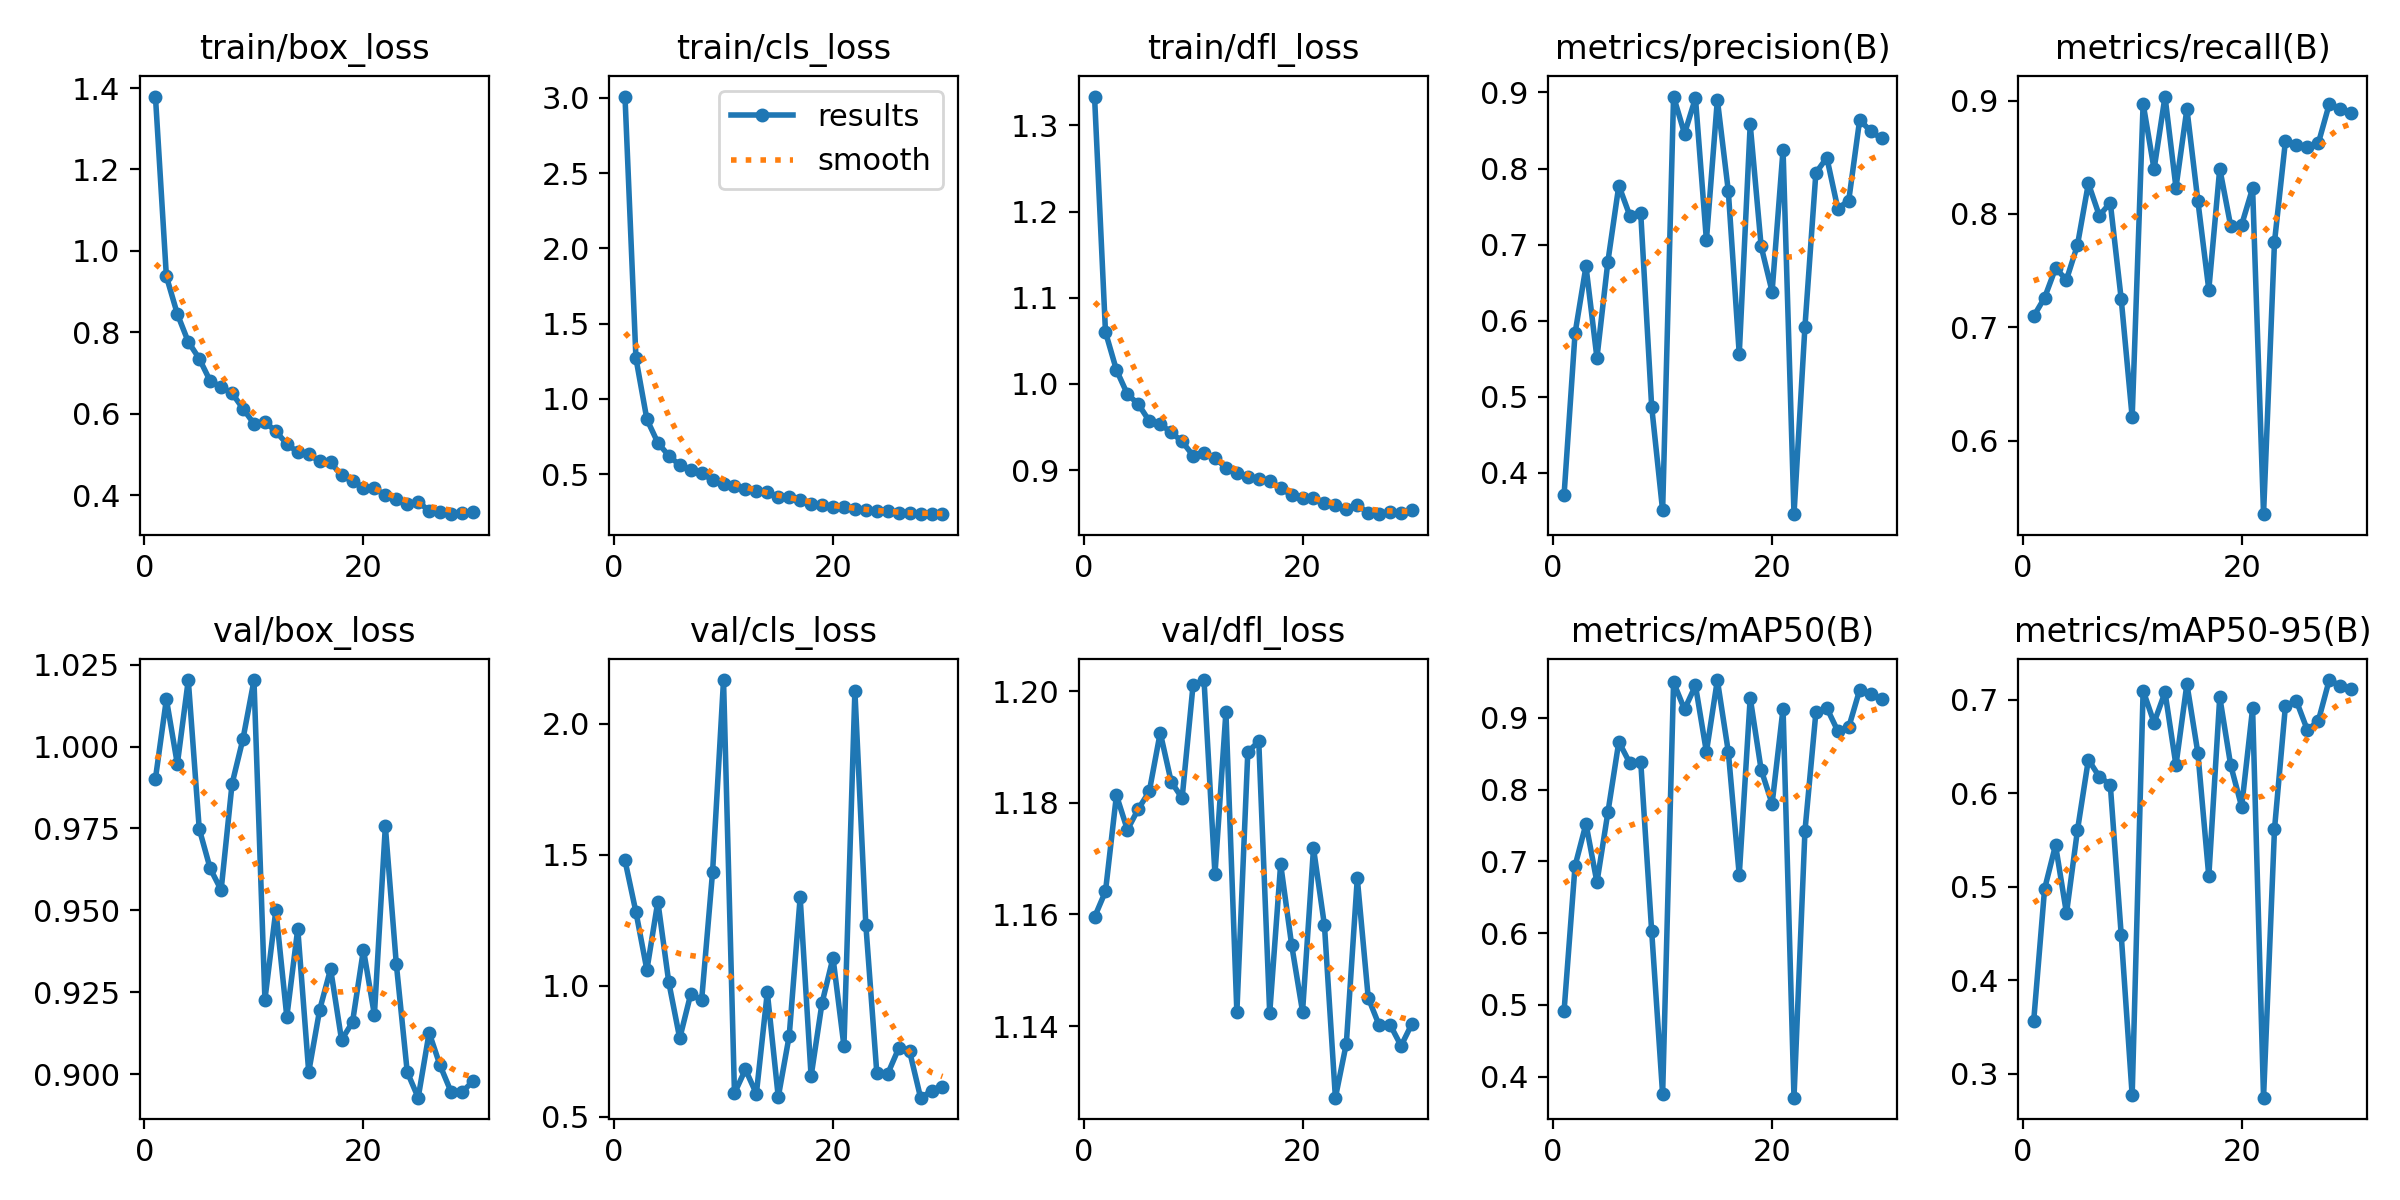

In [ ]:
Image(filename=f'/content/drive/MyDrive/Dataset/runs2/detect/train/results.png', width=600)


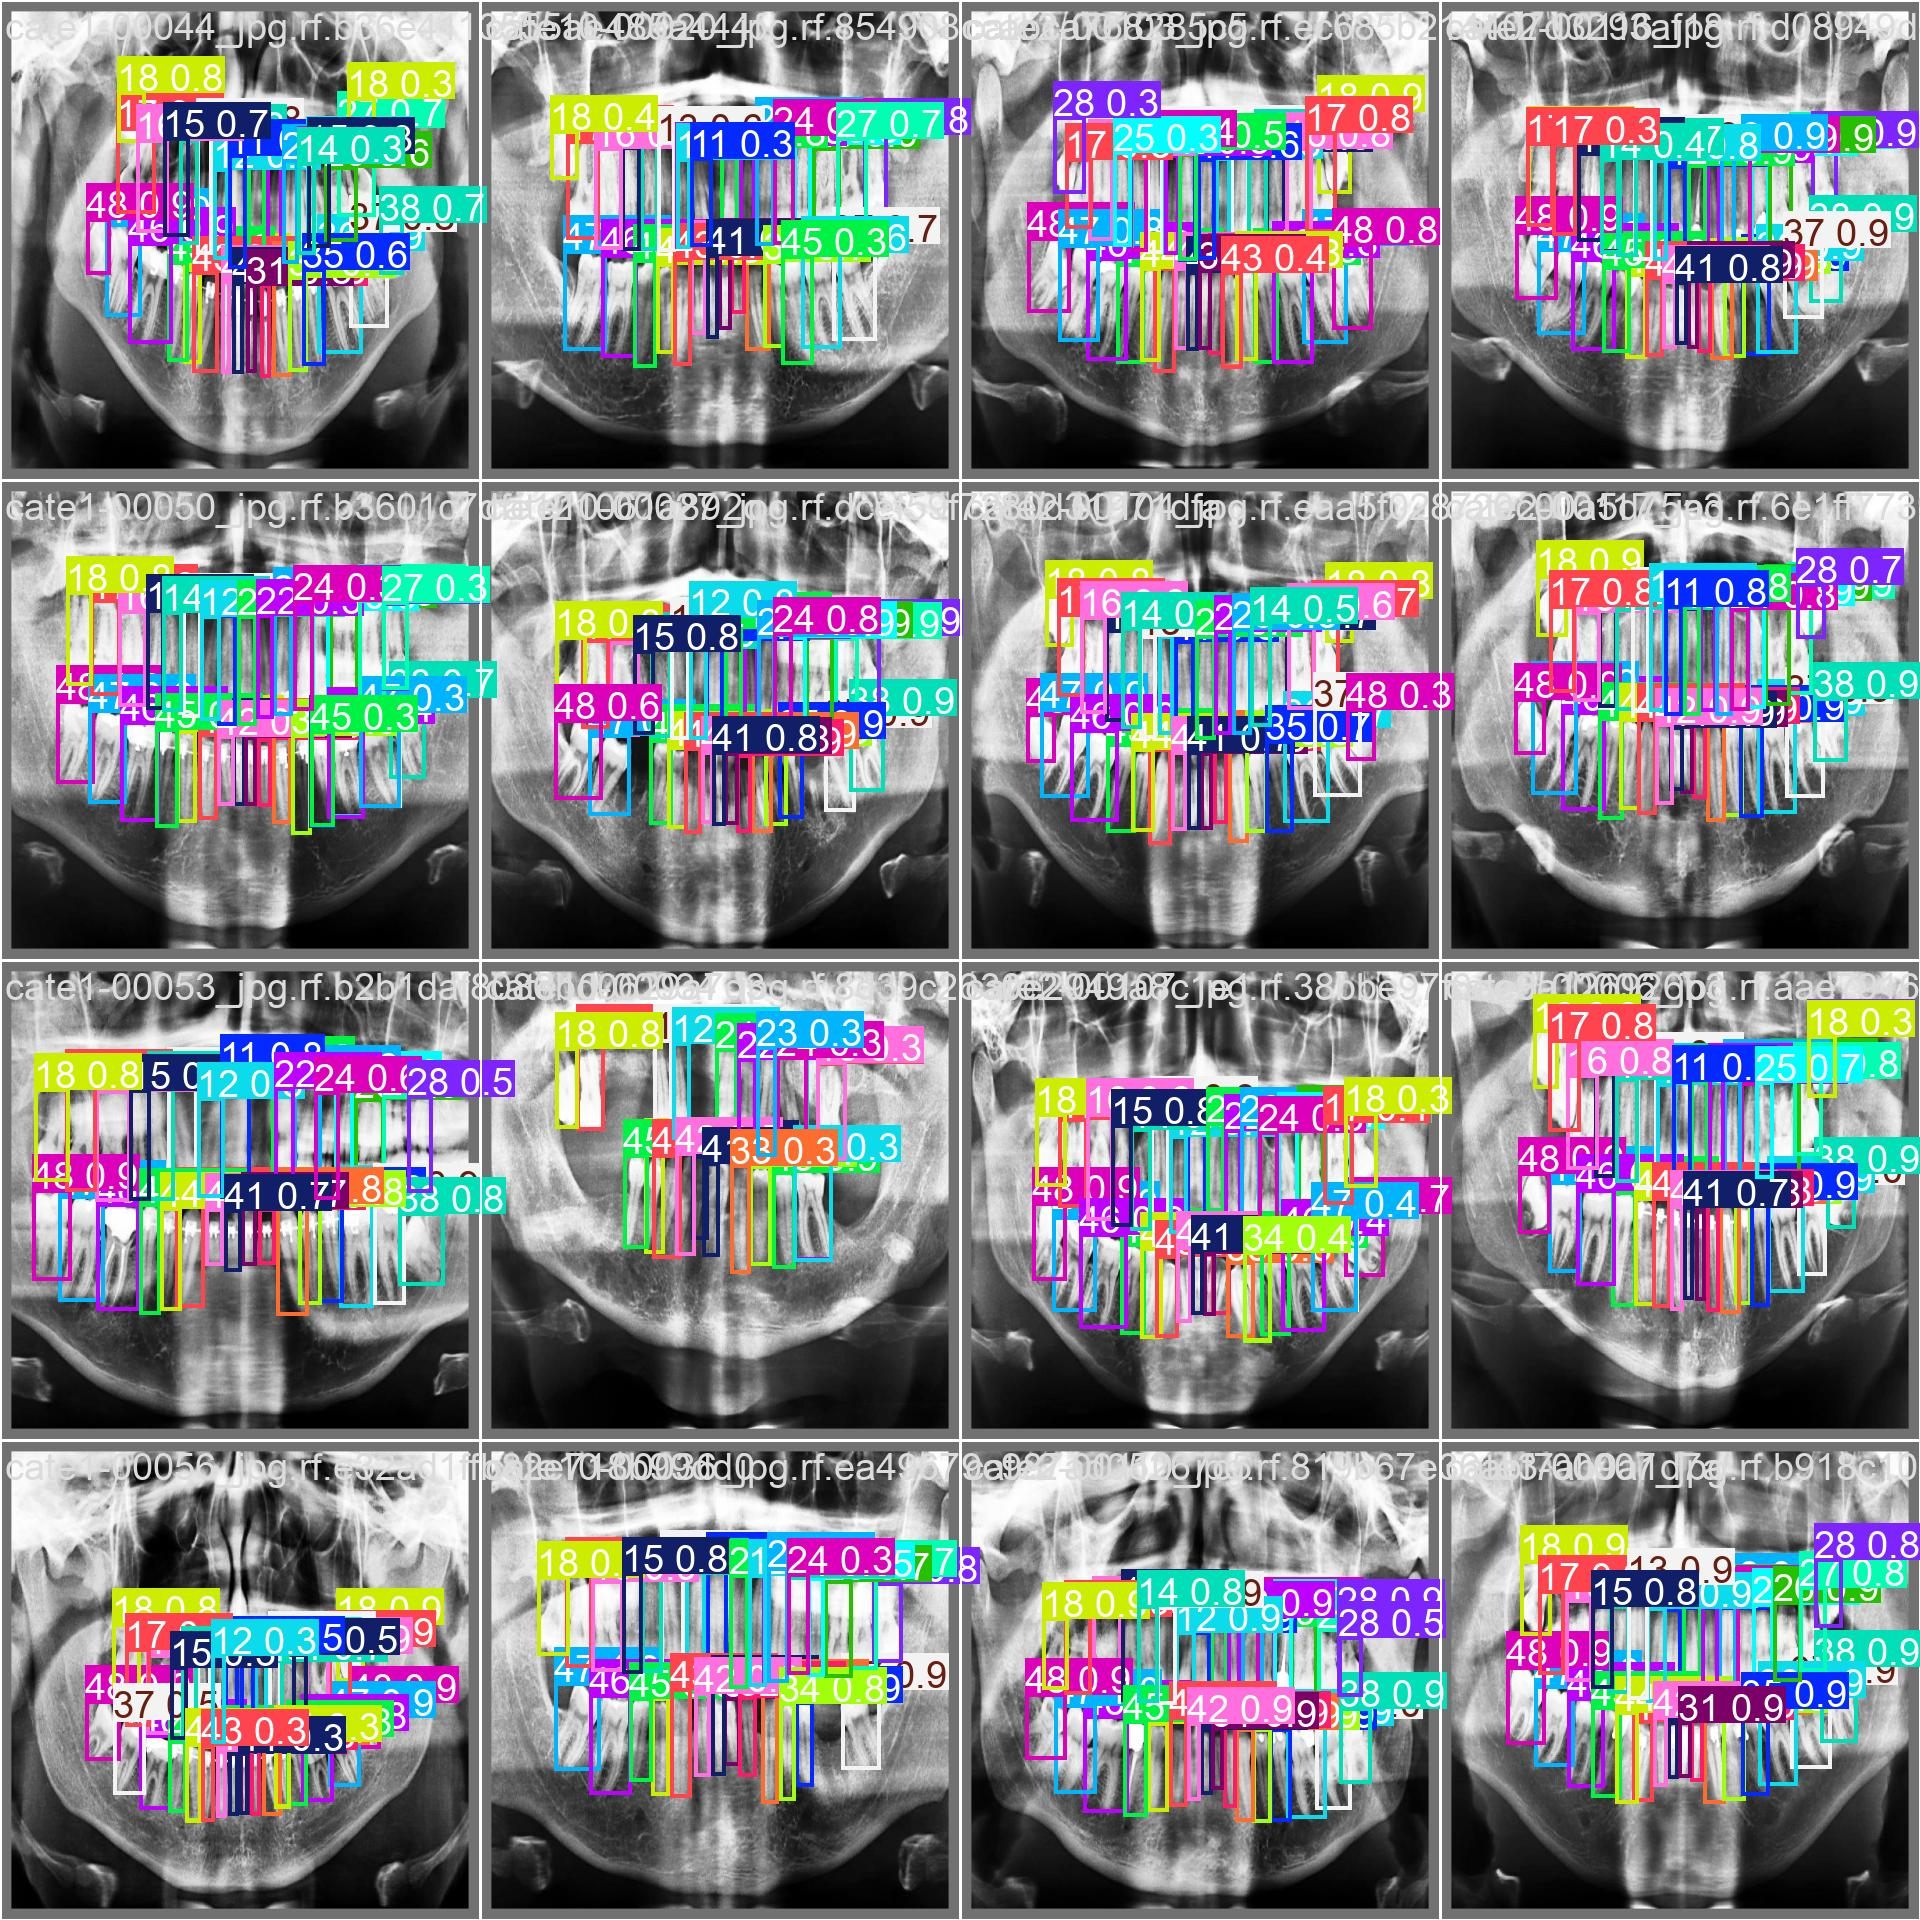

In [ ]:
Image(filename=f'/content/drive/MyDrive/Dataset/runs2/detect/train/val_batch0_pred.jpg', width=600)


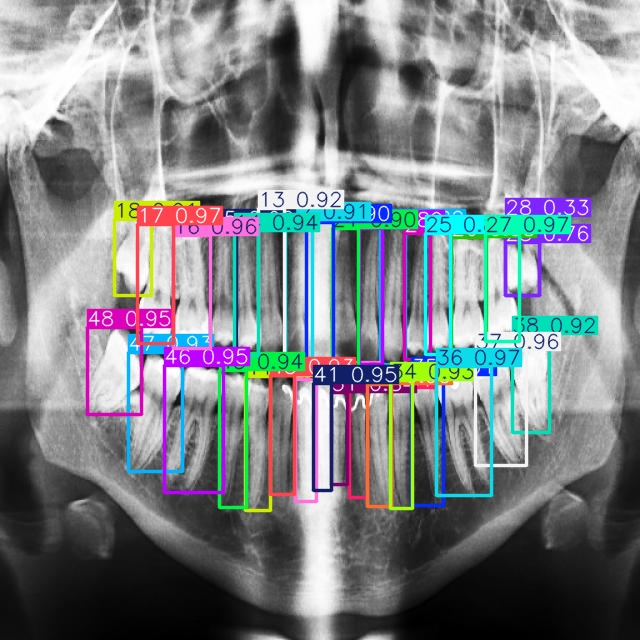

In [ ]:
Image(filename=f'/content/drive/MyDrive/Dataset/predict/cate1-00026_jpg.rf.365e2e2d1d708d69d19a27a09f0b05de.jpg', width=600)

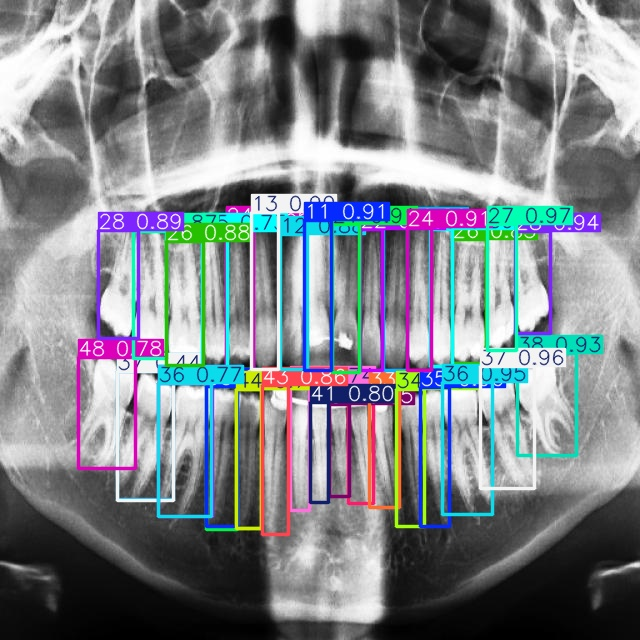

In [ ]:
Image(filename=f'/content/drive/MyDrive/Dataset/predict/cate1-00041_jpg.rf.08c050565c2241e65e4ca3ce7f714368.jpg', width=600)

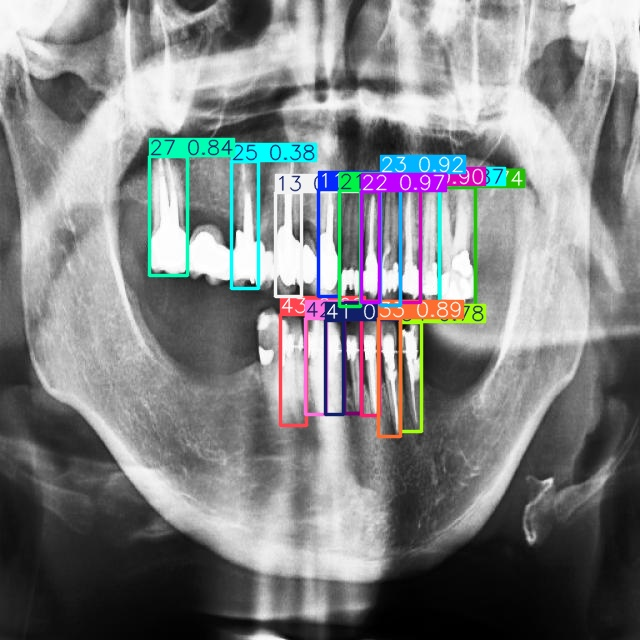

In [ ]:
Image(filename=f'/content/drive/MyDrive/Dataset/predict/cate7-00050_jpg.rf.d4270cdb911fe6fa3ede8caef193e6b1.jpg', width=600)

In [ ]:
!yolo task=detect mode=val model= '/content/drive/MyDrive/Dataset/runs2/detect/train/weights/best.pt' data=/content/drive/MyDrive/Dataset/teeth-segmentation-15/data.yaml  iou=0.5 conf=0.5

Ultralytics 8.3.93 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 68,154,384 parameters, 0 gradients, 257.6 GFLOPs
100% 755k/755k [00:00<00:00, 104MB/s]
val: Scanning /content/drive/MyDrive/Dataset/teeth-segmentation-15/valid/labels.cache... 64 images, 0 backgrounds, 0 corrupt: 100% 64/64 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0% 0/4 [00:02<?, ?it/s]
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 708, in __next__
    data = self._next_data()
           ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1458, in _next_data
    idx, data = self._get_data()
                ^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1410, in _get_data
    success, data = self._try_get_data()
            

In [ ]:
!yolo task=segment mode=predict model=/content/drive/MyDrive/Dataset/runs2/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/Dataset/teeth-segmentation-15/test/images save=true


WARNING ⚠️ conflicting 'task=segment' passed with 'task=detect' model. Ignoring 'task=segment' and updating to 'task=detect' to match model.
Ultralytics 8.3.93 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 68,154,384 parameters, 0 gradients, 257.6 GFLOPs

image 1/64 /content/drive/MyDrive/Dataset/teeth-segmentation-15/test/images/cate1-00026_jpg.rf.365e2e2d1d708d69d19a27a09f0b05de.jpg: 640x640 1 11, 1 12, 1 13, 1 14, 1 15, 1 16, 1 17, 1 18, 1 21, 1 22, 1 23, 1 24, 1 25, 1 26, 1 27, 2 28s, 1 31, 1 32, 1 33, 1 34, 1 35, 1 36, 1 37, 1 38, 1 41, 1 42, 1 43, 1 44, 1 45, 1 46, 1 47, 1 48, 82.2ms
image 2/64 /content/drive/MyDrive/Dataset/teeth-segmentation-15/test/images/cate1-00041_jpg.rf.08c050565c2241e65e4ca3ce7f714368.jpg: 640x640 1 11, 1 12, 1 13, 1 14, 1 15, 1 16, 1 17, 1 18, 1 21, 1 22, 1 23, 1 24, 1 25, 1 26, 1 27, 1 28, 1 31, 1 32, 1 33, 1 34, 1 35, 1 36, 1 37, 1 38, 1 41, 1 42, 1 43, 1 44, 1 45, 1 46, 1 47, 1 48, 96.5ms
image 3/64 

In [ ]:
import shutil
shutil.move("/content/runs/detect/predic","/content/drive/MyDrive/Dataset")

'/content/drive/MyDrive/Dataset/predic'

In [ ]:
!yolo task=segment mode=predict model=/content/drive/MyDrive/Dataset/runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/2.jpg save=true

WARNING ⚠️ conflicting 'task=segment' passed with 'task=detect' model. Ignoring 'task=segment' and updating to 'task=detect' to match model.
Ultralytics 8.3.86 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 112 layers, 68,154,384 parameters, 0 gradients, 257.6 GFLOPs

image 1/1 /content/drive/MyDrive/2.jpg: 352x640 1 11, 1 12, 1 13, 1 14, 2 16s, 1 21, 1 22, 1 23, 1 24, 1 25, 1 26, 1 27, 1 31, 1 32, 1 33, 1 34, 1 35, 1 37, 1 41, 1 42, 1 43, 1 44, 1 45, 1 46, 1 47, 3774.1ms
Speed: 18.2ms preprocess, 3774.1ms inference, 38.6ms postprocess per image at shape (1, 3, 352, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


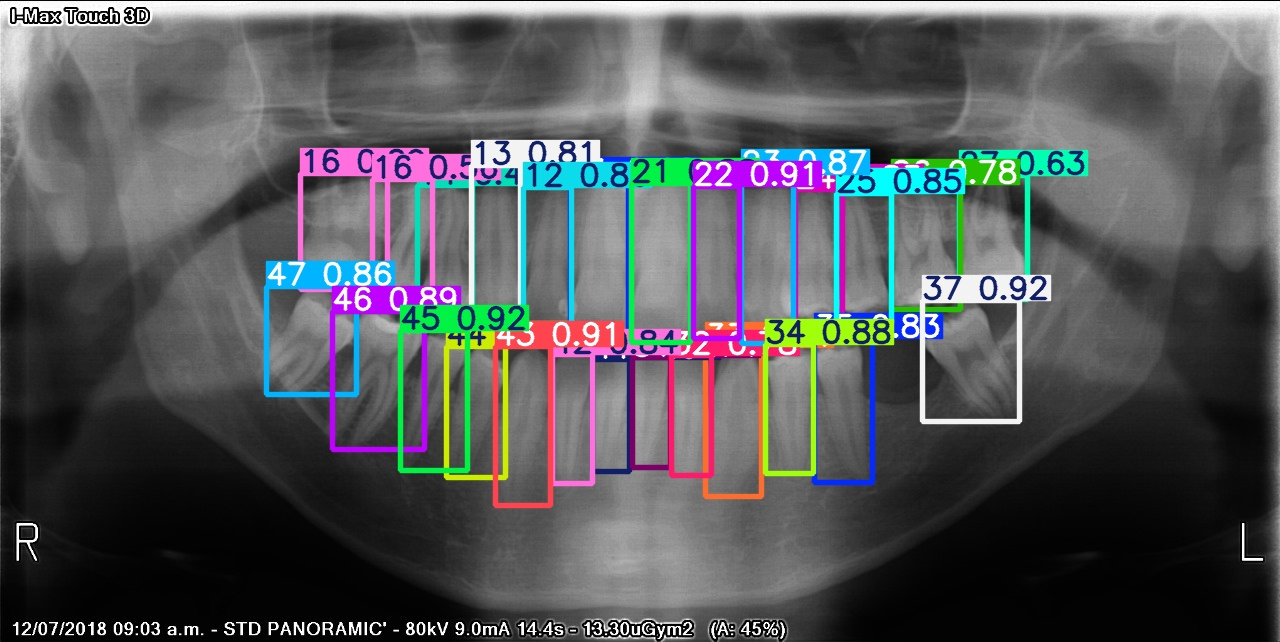

In [ ]:
Image(filename=f'/content/runs/detect/predict/2.jpg', width=600)

In [ ]:
!yolo task=segment mode=predict model=/content/drive/MyDrive/Dataset/runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/3.jpg save=true

WARNING ⚠️ conflicting 'task=segment' passed with 'task=detect' model. Ignoring 'task=segment' and updating to 'task=detect' to match model.
Ultralytics 8.3.86 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 112 layers, 68,154,384 parameters, 0 gradients, 257.6 GFLOPs

image 1/1 /content/drive/MyDrive/3.jpg: 416x640 1 11, 1 12, 1 13, 1 14, 1 15, 1 16, 1 17, 2 18s, 1 21, 1 22, 1 23, 1 24, 1 25, 1 26, 1 27, 2 31s, 1 32, 1 33, 1 34, 1 35, 1 36, 3 41s, 2 42s, 1 43, 1 44, 1 45, 2 46s, 2 47s, 1 48, 3269.2ms
Speed: 3.3ms preprocess, 3269.2ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


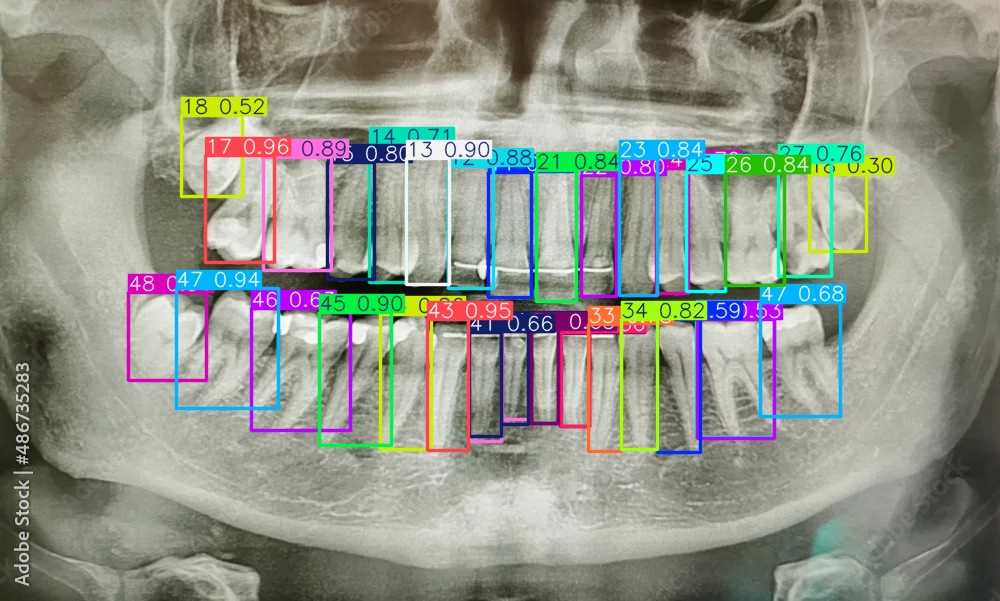

In [ ]:
Image(filename=f'/content/runs/detect/predict2/3.jpg', width=600)

In [ ]:
!yolo task=segment mode=predict model=/content/drive/MyDrive/Dataset/runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/4.jpg save=true

WARNING ⚠️ conflicting 'task=segment' passed with 'task=detect' model. Ignoring 'task=segment' and updating to 'task=detect' to match model.
Ultralytics 8.3.86 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 112 layers, 68,154,384 parameters, 0 gradients, 257.6 GFLOPs

image 1/1 /content/drive/MyDrive/4.jpg: 320x640 1 11, 1 12, 2 13s, 2 14s, 2 15s, 2 16s, 2 17s, 1 21, 1 22, 2 41s, 1 42, 2 43s, 2 44s, 2 45s, 2 46s, 2 47s, 2483.7ms
Speed: 7.3ms preprocess, 2483.7ms inference, 2.2ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


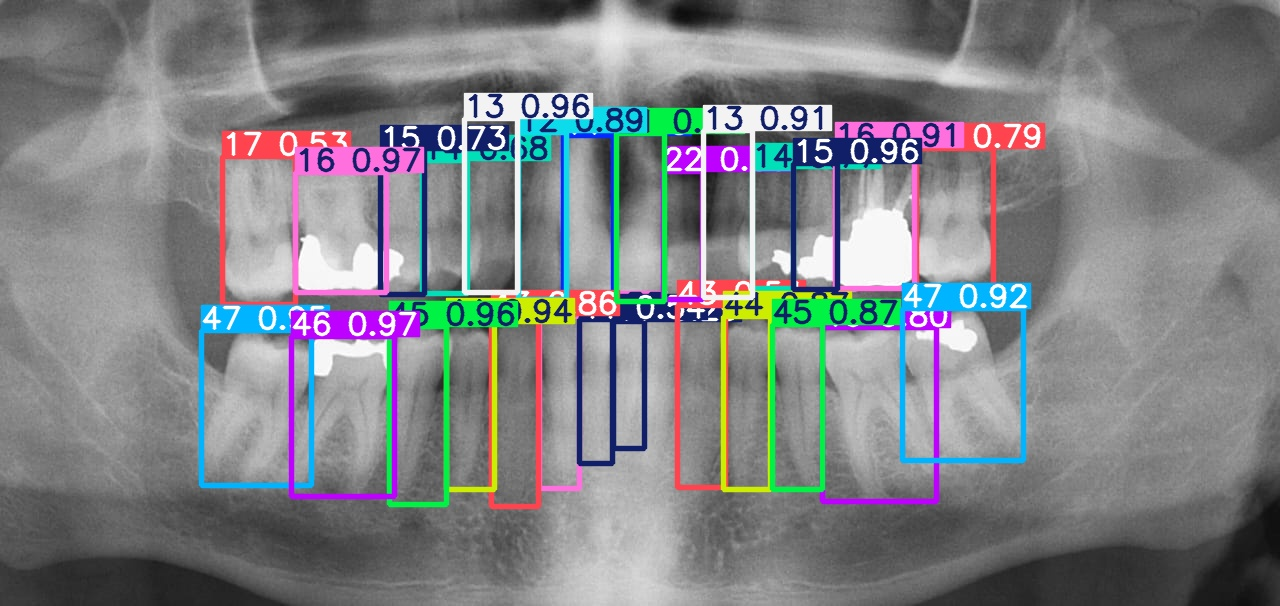

In [ ]:
Image(filename=f'/content/runs/detect/predict3/4.jpg', width=600)

In [ ]:
import os
import cv2
from ultralytics import YOLO

# 1. Load YOLO Model
model_path = '/content/drive/MyDrive/Dataset/runs/detect/train/weights/best.pt'  # Path to your trained YOLO model

# 2. Define Image Path and Output Folder
image_path = '/content/drive/MyDrive/2.jpg'  # Path to your input image
output_folder = '/content/drive/MyDrive/Dataset/extracted_teeth'  # Where you want to save the extracted teeth

# 3. Create Output Directory
os.makedirs(output_folder, exist_ok=True)

# 4. Load Model and Predict
model = YOLO(model_path)
results = model.predict(source=image_path, save=False, conf=0.25)  # Run prediction on the single image

# 5. Extract Teeth from the Image
image_name = os.path.basename(image_path).split('.')[0]
image = cv2.imread(image_path)
image_height, image_width = image.shape[:2]

xray_folder = os.path.join(output_folder, image_name)
os.makedirs(xray_folder, exist_ok=True)

for result in results:  # There will only be one result (for the single image)
    for i, (bbox, conf, cls) in enumerate(zip(result.boxes.xyxy, result.boxes.conf, result.boxes.cls)):
        x_min, y_min, x_max, y_max = map(int, bbox)

        x_min = max(0, x_min)
        y_min = max(0, y_min)
        x_max = min(image_width, x_max)
        y_max = min(image_height, y_max)

        class_name = result.names[int(cls)]
        cropped_tooth = image[y_min:y_max, x_min:x_max]

        tooth_image_path = os.path.join(xray_folder, f"tooth_{class_name}.jpg")
        cv2.imwrite(tooth_image_path, cropped_tooth)

        print(f"Saved tooth {class_name} for {image_name} at {tooth_image_path}")

print(f"All detections processed and saved in: {output_folder}")


image 1/1 /content/drive/MyDrive/2.jpg: 352x640 1 11, 1 12, 1 13, 1 14, 2 16s, 1 21, 1 22, 1 23, 1 24, 1 25, 1 26, 1 27, 1 31, 1 32, 1 33, 1 34, 1 35, 1 37, 1 41, 1 42, 1 43, 1 44, 1 45, 1 46, 1 47, 49.2ms
Speed: 2.7ms preprocess, 49.2ms inference, 1.5ms postprocess per image at shape (1, 3, 352, 640)
Saved tooth 45 for 2 at /content/drive/MyDrive/Dataset/extracted_teeth/2/tooth_45.jpg
Saved tooth 37 for 2 at /content/drive/MyDrive/Dataset/extracted_teeth/2/tooth_37.jpg
Saved tooth 22 for 2 at /content/drive/MyDrive/Dataset/extracted_teeth/2/tooth_22.jpg
Saved tooth 43 for 2 at /content/drive/MyDrive/Dataset/extracted_teeth/2/tooth_43.jpg
Saved tooth 46 for 2 at /content/drive/MyDrive/Dataset/extracted_teeth/2/tooth_46.jpg
Saved tooth 34 for 2 at /content/drive/MyDrive/Dataset/extracted_teeth/2/tooth_34.jpg
Saved tooth 21 for 2 at /content/drive/MyDrive/Dataset/extracted_teeth/2/tooth_21.jpg
Saved tooth 23 for 2 at /content/drive/MyDrive/Dataset/extracted_teeth/2/tooth_23.jpg
Saved to

**demo**

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image using mpimg
image_path = '/content/drive/MyDrive/Dataset/predict/cate1-00041_jpg.rf.08c050565c2241e65e4ca3ce7f714368.jpg'
img = mpimg.imread(image_path)

# Display the image using Matplotlib
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figsize as needed

# Display the image, setting extent for axes (centered)
img_width = img.shape[1]
img_height = img.shape[0]
extent = [-img_width / 2, img_width / 2, -img_height / 2, img_height / 2]
ax.imshow(img, extent=extent)

# Set axes labels
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")

# Move spines to the middle
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')  # Hide right spine
ax.spines['top'].set_color('none')    # Hide top spine

# Show the plot
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Dataset/predict/cate1-00041_jpg.rf.08c050565c2241e65e4ca3ce7f714368.jpg'

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 93.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
from ultralytics import YOLO
import os
import cv2

# Load the trained model
model = YOLO('/content/drive/MyDrive/Dataset/runs/detect/train/weights/best.pt')  # Replace with the correct path if saved elsewhere


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

def process_folder_with_correct_mapping(input_folder, output_folder, model_path):
    """
    Processes all images in a folder, applies FDI quadrant correction with direct mapping,
    and saves the corrected images to an output folder.

    Args:
    - input_folder (str): Path to the folder containing the images
    - output_folder (str): Path to save the corrected images
    - model_path (str): Path to the YOLO model weights
    """

    # Load YOLO model
    model = YOLO(model_path)

    # Ensure output folder exists
    os.makedirs(output_folder, exist_ok=True)

    # FDI quadrant mapping with direct opposites
    quadrant_mapping = {
        2: {"18": "28", "17": "27", "16": "26", "15": "25", "14": "24", "13": "23", "12": "22", "11": "21"},
        1: {"28": "18", "27": "17", "26": "16", "25": "15", "24": "14", "23": "13", "22": "12", "21": "11"},
        3: {"38": "48", "37": "47", "36": "46", "35": "45", "34": "44", "33": "43", "32": "42", "31": "41"},
        4: {"48": "38", "47": "37", "46": "36", "45": "35", "44": "34", "43": "33", "42": "32", "41": "31"}
    }

    # Iterate through all images in the folder
    for image_name in os.listdir(input_folder):
        if image_name.lower().endswith(('.jpg', '.png', '.jpeg')):
            image_path = os.path.join(input_folder, image_name)

            # Load the image
            image = cv2.imread(image_path)
            img_height, img_width = image.shape[:2]

            # Perform inference
            results = model.predict(source=image_path, save=False, conf=0.25)

            # Iterate through detections
            for result in results:
                for i, (bbox, conf, cls) in enumerate(zip(result.boxes.xyxy, result.boxes.conf, result.boxes.cls)):
                    x_min, y_min, x_max, y_max = map(int, bbox)
                    label = result.names[int(cls)]

                    # Determine quadrant
                    x_center = (x_min + x_max) / 2
                    y_center = (y_min + y_max) / 2

                    if x_center < img_width / 2 and y_center < img_height / 2:
                        quadrant = 1
                    elif x_center >= img_width / 2 and y_center < img_height / 2:
                        quadrant = 2
                    elif x_center < img_width / 2 and y_center >= img_height / 2:
                        quadrant = 3
                    else:
                        quadrant = 4

                    # Correct label with direct mapping
                    if label in quadrant_mapping[quadrant]:
                        corrected_label = quadrant_mapping[quadrant][label]
                        print(f"Correcting {label} in quadrant {quadrant} → {corrected_label}")
                        label = corrected_label

                    # Draw bounding box and corrected label
                    color = (0, 255, 0)  # Green for corrected label
                    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, 2)
                    cv2.putText(image, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

            # Save the corrected image
            output_path = os.path.join(output_folder, image_name)
            cv2.imwrite(output_path, image)
            print(f"Saved corrected image: {output_path}")


In [ ]:
# Example usage
input_folder = "/content/drive/MyDrive/new"  # Folder with X-ray images
output_folder = "/content/drive/MyDrive/Untitled Folder"  # Folder to save corrected images
model_path = "/content/drive/MyDrive/Dataset/runs/detect/train/weights/best.pt"  # YOLO model path

# Process the folder and save corrected images
process_folder_with_correct_mapping(input_folder, output_folder, model_path)


image 1/1 /content/drive/MyDrive/new/2.jpg: 352x640 1 11, 1 12, 1 13, 1 14, 2 16s, 1 21, 1 22, 1 23, 1 24, 1 25, 1 26, 1 27, 1 31, 1 32, 1 33, 1 34, 1 35, 1 37, 1 41, 1 42, 1 43, 1 44, 1 45, 1 46, 1 47, 67.9ms
Speed: 15.4ms preprocess, 67.9ms inference, 378.1ms postprocess per image at shape (1, 3, 352, 640)
Saved corrected image: /content/drive/MyDrive/Untitled Folder/2.jpg

image 1/1 /content/drive/MyDrive/new/3.jpg: 416x640 1 11, 1 12, 1 13, 1 14, 1 15, 1 16, 1 17, 2 18s, 1 21, 1 22, 1 23, 1 24, 1 25, 1 26, 1 27, 2 31s, 1 32, 1 33, 1 34, 1 35, 1 36, 3 41s, 2 42s, 1 43, 1 44, 1 45, 2 46s, 2 47s, 1 48, 62.6ms
Speed: 2.2ms preprocess, 62.6ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)
Correcting 47 in quadrant 4 → 37
Correcting 46 in quadrant 4 → 36
Correcting 11 in quadrant 2 → 21
Correcting 41 in quadrant 4 → 31
Correcting 42 in quadrant 4 → 32
Correcting 41 in quadrant 4 → 31
Correcting 18 in quadrant 2 → 28
Saved corrected image: /content/drive/MyDrive/Untitle